In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv(r"C:\Users\elham\Desktop\excel\Bengaluru_House_Data.csv")

# Data Exploration

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [8]:
df.info

<bound method DataFrame.info of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.

In [9]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [10]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [11]:
df.sort_values(by='price',ascending=False).head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13067,Plot Area,Ready To Move,Defence Colony,10 Bedroom,NaN,7150,13.0,NaN,3600.0
11080,Super built-up Area,18-Jan,Ashok Nagar,4 BHK,NaN,8321,5.0,2.0,2912.0
13200,Plot Area,Ready To Move,Defence Colony,6 Bedroom,NaN,8000,6.0,3.0,2800.0
11763,Plot Area,Ready To Move,Sadashiva Nagar,5 Bedroom,NaN,9600,7.0,2.0,2736.0
3180,Super built-up Area,Ready To Move,Shanthala Nagar,5 BHK,Kierser,8321,5.0,3.0,2700.0


In [12]:
df['price'].quantile([0.25,0.5,0.75])

0.25     50.0
0.50     72.0
0.75    120.0
Name: price, dtype: float64

# Data Cleaning

In [13]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13315    False
13316    False
13317    False
13318    False
13319     True
Length: 13320, dtype: bool

In [15]:
df=df.drop_duplicates()

In [16]:
df=df.dropna()
#df.fillna(value), df.fillna(method=, inplace=True)

In [17]:
df.shape

(7144, 9)

# Drop features that are not required to build our model

In [18]:
df=df.drop(['area_type','availability','balcony','society'],axis='columns')

In [19]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
5,Whitefield,2 BHK,1170,2.0,38.00
11,Whitefield,4 Bedroom,2785,5.0,295.00


# Feature engineering 

In [20]:
df['bhk']=df['size'].apply(lambda x: int(x.split(' ')[0]))

In [21]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
5,Whitefield,2 BHK,1170,2.0,38.00,2
11,Whitefield,4 Bedroom,2785,5.0,295.00,4


In [22]:


df=df.drop('size',axis=1)


# Encode categorical data

In [23]:
df=pd.get_dummies(df,columns=['location'],dtype=int)

In [35]:
df.sample(20)

,total_sqft,bath,price,bhk,location_ Banaswadi,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Rachenahalli,...,location_Volagerekallahalli,location_Whitefield,location_Wilson Garden,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_Yeshwanthpur Industrial Suburb
10398,-0.460428,-0.522612,-0.632288,-0.723267,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11365,0.704498,0.605005,1.630340,0.633619,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12865,-0.329585,-0.522612,-0.493756,-0.723267,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1378,-0.386565,-0.522612,-0.260851,-0.723267,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4876,-1.136803,-1.650230,-0.731319,-2.080154,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3029,0.128366,0.605005,-0.186321,0.633619,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3025,-0.098499,-0.522612,-0.465807,-0.723267,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7209,-0.350689,-0.522612,-0.447175,-0.723267,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13106,-0.355965,-0.522612,-0.354013,-0.723267,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12437,0.213836,0.605005,0.065217,0.633619,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Handeling object column

In [25]:
df.dtypes

total_sqft                                  object
bath                                       float64
price                                      float64
bhk                                          int64
location_ Banaswadi                          int32
                                            ...   
location_Yelahanka New Town                  int32
location_Yelenahalli                         int32
location_Yemlur                              int32
location_Yeshwanthpur                        int32
location_Yeshwanthpur Industrial Suburb      int32
Length: 638, dtype: object

In [26]:
#chcek if all values are numbers
is_numeric=df['total_sqft'].str.isnumeric().all()
print(is_numeric)

False


In [27]:
#handeling non-numeric value 
df['total_sqft']=pd.to_numeric(df['total_sqft'],errors='coerce')

In [28]:
df.dtypes

total_sqft                                 float64
bath                                       float64
price                                      float64
bhk                                          int64
location_ Banaswadi                          int32
                                            ...   
location_Yelahanka New Town                  int32
location_Yelenahalli                         int32
location_Yemlur                              int32
location_Yeshwanthpur                        int32
location_Yeshwanthpur Industrial Suburb      int32
Length: 638, dtype: object

Scaling your data

In [31]:
correlation_matrix=df[['total_sqft','bath','price','bhk']].corr()
correlation_matrix

,total_sqft,bath,price,bhk
total_sqft,1.000000,0.616173,0.667544,0.579055
bath,0.616173,1.000000,0.594312,0.823948
price,0.667544,0.594312,1.000000,0.527017
bhk,0.579055,0.823948,0.527017,1.000000


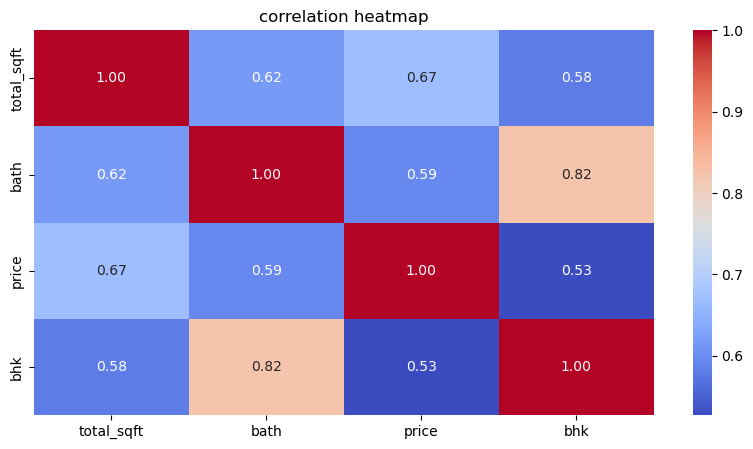

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation heatmap')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical_columns=['total_sqft','bath','price','bhk']
df[numerical_columns]=scaler.fit_transform(df[numerical_columns])
df



,total_sqft,bath,price,bhk,location_ Banaswadi,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Rachenahalli,...,location_Volagerekallahalli,location_Whitefield,location_Wilson Garden,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_Yeshwanthpur Industrial Suburb
0,-0.481532,-0.522612,-0.549001,-0.723267,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.147677,2.860241,0.204960,1.990505,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.009130,0.605005,-0.027945,0.633619,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.361241,-0.522612,-0.558969,-0.723267,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11,1.342886,2.860241,1.835296,1.990505,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13308,0.015461,0.605005,0.409916,0.633619,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,0.213836,0.605005,0.130430,0.633619,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,2.047751,1.732623,1.239059,3.347391,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13317,-0.391841,-0.522612,-0.354013,-0.723267,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Outlier detection and removal

In [37]:
threshold=3
for column in ['total_sqft','bath','price']:
    z_scores=np.abs(zscore(df[column]))
    outliers=z_scores>threshold
    print(f"outliers in {column}:\n",df[outliers])
    
df_cleaned=df[np.abs(zscore(df['total_sqft']))<threshold & (np.abs(zscore(df['price'])))<threshold,
              (np.abs(zscore(df['bath'])))<threshold]

print(df_cleaned)

NameError: name 'zscore' is not defined